https://drive.google.com/file/d/1sIDqktEhJiEssTcATuWHLOVzC3zmQY1Q/view?usp=sharing

# Первый этап: предобработка

## Загрузка и очистка данных

Загрузите таблицу данных в переменную как таблицу pandas (pandas.DataFrame).

In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('Квартиры 2014 кольцо.csv')

Проверьте правильность загрузки, выведя на экран часть таблицы

In [2]:
print(data.shape)
data.head()

(2002, 20)


,Идентификатор,Комнатность,Новостройка,Метро.Район,Время.до.метро,Улица,Дом,Этаж,Этажность,Площадь.общая,Площадь.жилая,Площадь.кухни,Ценавруб.,Ценавдолл.,Ценавевро,Источник.получения,Дата.объявления,Контакты,На.сайте,Описание
0,24016418,1,Нет,Киевская,15.0,Сколковское ш.,36,4,9.0,21.0,16.0,4.0,3500000.0,99488,73466,Дом Сервис+,23.01.2014 5:20:30,"Тел.: 89150801223, http://www.7829980.ru, mail...",NaN,"Квартира 1-комн., общ.пл.-21, жил.пл.-16, кухн..."
1,23454997,1,Нет,Киевская,10.0,Матвеевская,26,5,5.0,31.0,18.0,6.0,4700000.0,133598,98654,Азбука Жилья,19.10.2013 5:05:10,"Тел.: +7 (495) 795-0569, http://http://www.azb...",NaN,"Квартира 1-комн., общ.пл.-31, жил.пл.-18, кухн..."
2,23697825,1,Нет,Марксистская,10.0,Бронницкая,4,5,5.0,32.0,18.0,7.0,5000000.0,145942,107770,ИНКОМ-Недвижимость,13.11.2013 12:20:37,"Тел.: +7(495)363-01-60, mailto:mk_tg@incom.ru",http://www.incom.ru/sale-realty/flats/lot/?L=в...,"Квартира 1-комн., общ.пл.-32.00, жил.пл.-18.00..."
3,23712199,1,Нет,Марксистская,5.0,Нижегородская,53,1,9.0,36.0,14.4,8.0,5350000.0,156158,115314,ИНКОМ-Недвижимость,16.11.2013 12:20:46,"Тел.: +7(495)363-01-60, mailto:mk_tg@incom.ru",http://www.incom.ru/sale-realty/flats/lot/?L=в...,"Квартира 1-комн., общ.пл.-36.00, жил.пл.-14.40..."
4,23701679,2,Нет,Таганская,10.0,Карачаровская 1-я,17,5,5.0,41.0,25.0,6.0,5350000.0,156158,115314,ИНКОМ-Недвижимость,14.11.2013 12:20:55,"Тел.: +7(495)363-01-60, mailto:mk_tg@incom.ru",http://www.incom.ru/sale-realty/flats/lot/?L=в...,"Квартира 2-комн., общ.пл.-41.00, жил.пл.-25.00..."


Поля 'Идентификатор', 'Улица', 'Дом', ‘Источник.получения', 'Дата.объявления', 'Контакты', 'На.сайте', 'Описание' являются незначащими. Поля 'Ценавдолл.',       'Ценавевро' излишни, они переводят в валюту цену в рублях. удалите все перечисленные поля из таблицы.

In [3]:
drop_this = ['Идентификатор', 'Улица', 'Дом', 'Источник.получения', 'Дата.объявления', 'Контакты', 'На.сайте', 'Описание','Ценавдолл.', 'Ценавевро']
data.drop(columns=drop_this, inplace = True)
data.head()

,Комнатность,Новостройка,Метро.Район,Время.до.метро,Этаж,Этажность,Площадь.общая,Площадь.жилая,Площадь.кухни,Ценавруб.
0,1,Нет,Киевская,15.0,4,9.0,21.0,16.0,4.0,3500000.0
1,1,Нет,Киевская,10.0,5,5.0,31.0,18.0,6.0,4700000.0
2,1,Нет,Марксистская,10.0,5,5.0,32.0,18.0,7.0,5000000.0
3,1,Нет,Марксистская,5.0,1,9.0,36.0,14.4,8.0,5350000.0
4,2,Нет,Таганская,10.0,5,5.0,41.0,25.0,6.0,5350000.0


Проверьте типы данных полей.

In [4]:
# data.dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2002 entries, 0 to 2001
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Комнатность     2002 non-null   int64  
 1   Новостройка     2002 non-null   object 
 2   Метро.Район     2002 non-null   object 
 3   Время.до.метро  1801 non-null   float64
 4   Этаж            1995 non-null   object 
 5   Этажность       1971 non-null   float64
 6   Площадь.общая   1999 non-null   float64
 7   Площадь.жилая   1843 non-null   float64
 8   Площадь.кухни   891 non-null    float64
 9   Ценавруб.       2002 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 156.5+ KB


Одно из полей, которое явно должно быть числовым, загрузилось как текстовое (object). Очевидно, это из-за того, что в него попала нечисловая информация. Посмотрите, какие лишние значения попали в это поле. Замените эти лишние значения на пустые значения (numpy.nan). Переведите поле в числовой тип.


In [5]:
# очевидно, что это поле 'Этаж', превращаем его в числовое (errors='coerce' чтобы превратить в nan-ки, как я помню в pandas всё в numpy, так что оно)
data['Этаж'] = pd.to_numeric(data['Этаж'], errors='coerce')
# data.apply(set)['Этаж']

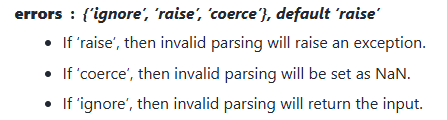

Для контроля снова проверьте типы данных полей.

In [6]:
# повторно проверим что там с полями, а особенно с 'Этаж'
print(data['Этаж'].unique(), end="\n\n")
data.info()

[ 4.  5.  1.  8.  3.  2.  9. nan 12.  7. 10.  6. 11. 16. 19. 13. 14. 17.
 18. 22. 24. 28. 20. 15. 31. 21. 33. 25. 27. 37. 29. 36. 41. 35. 44. 46.
 40. 47. 38. 45. 32. 30. 26. 42. 49. 34.]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2002 entries, 0 to 2001
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Комнатность     2002 non-null   int64  
 1   Новостройка     2002 non-null   object 
 2   Метро.Район     2002 non-null   object 
 3   Время.до.метро  1801 non-null   float64
 4   Этаж            1991 non-null   float64
 5   Этажность       1971 non-null   float64
 6   Площадь.общая   1999 non-null   float64
 7   Площадь.жилая   1843 non-null   float64
 8   Площадь.кухни   891 non-null    float64
 9   Ценавруб.       2002 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 156.5+ KB


In [7]:
# появилась небольшая "проблема", но скорее особенность: теперь этажи во float, ведь NaN, как я нагуглил, реализован во float. в целом, ничего не меняяется, почти все остальное уже во float

Удалите возможные дубликаты

In [8]:
data.duplicated().sum()

403

In [9]:
data = data.drop_duplicates()
data.duplicated().sum()

0

## Работа с пропусками

Проверьте число пропусков в каждом столбце.

In [10]:
data.isnull().sum()

,0
Комнатность,0
Новостройка,0
Метро.Район,0
Время.до.метро,201
Этаж,11
Этажность,31
Площадь.общая,3
Площадь.жилая,159
Площадь.кухни,714
Ценавруб.,0


Поля 'Площадь.общая' и 'Площадь.жилая' сильно коррелируют между собой. Удалите то из них, которое содержит больше пропусков.

In [11]:
print(data[['Площадь.общая', 'Площадь.жилая']].corr(), end='\n\n')
print(data[['Площадь.общая', 'Площадь.жилая']].isnull().sum())

               Площадь.общая  Площадь.жилая
Площадь.общая       1.000000       0.169244
Площадь.жилая       0.169244       1.000000

Площадь.общая      3
Площадь.жилая    159
dtype: int64


In [12]:
data.drop(columns=['Площадь.жилая'], inplace=True)

Импутируйте поле 'Время.до.метро' медианным значением.

In [13]:
median_metro = data['Время.до.метро'].median()
data['Время.до.метро'] = data['Время.до.метро'].fillna(median_metro)

Импутируйте поле 'Площадь.кухни’ средним значением в разрезе комнат (средней площадью кухни для квартир с таким количеством комнат).

In [14]:
mean_kitchen = data.groupby('Комнатность')['Площадь.кухни'].transform('mean')
data['Площадь.кухни'] = data['Площадь.кухни'].fillna(mean_kitchen)

Проверьте, в каких полях остались пропуски. Их должно остаться немного. Удалите строки, в которых все еще остались пропуски

In [15]:
data.isnull().sum()

,0
Комнатность,0
Новостройка,0
Метро.Район,0
Время.до.метро,0
Этаж,11
Этажность,31
Площадь.общая,3
Площадь.кухни,6
Ценавруб.,0


In [16]:
data = data.dropna(how='any')

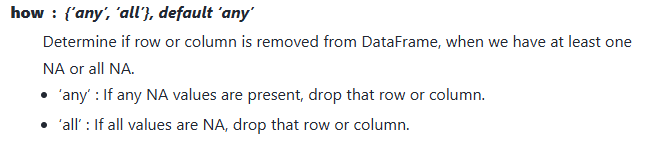

In [17]:
data.shape

(1560, 9)

## Работа с выбросами

Постройте гистограммы для всех числовых полей

In [18]:
print(data.dtypes)

Комнатность         int64
Новостройка        object
Метро.Район        object
Время.до.метро    float64
Этаж              float64
Этажность         float64
Площадь.общая     float64
Площадь.кухни     float64
Ценавруб.         float64
dtype: object


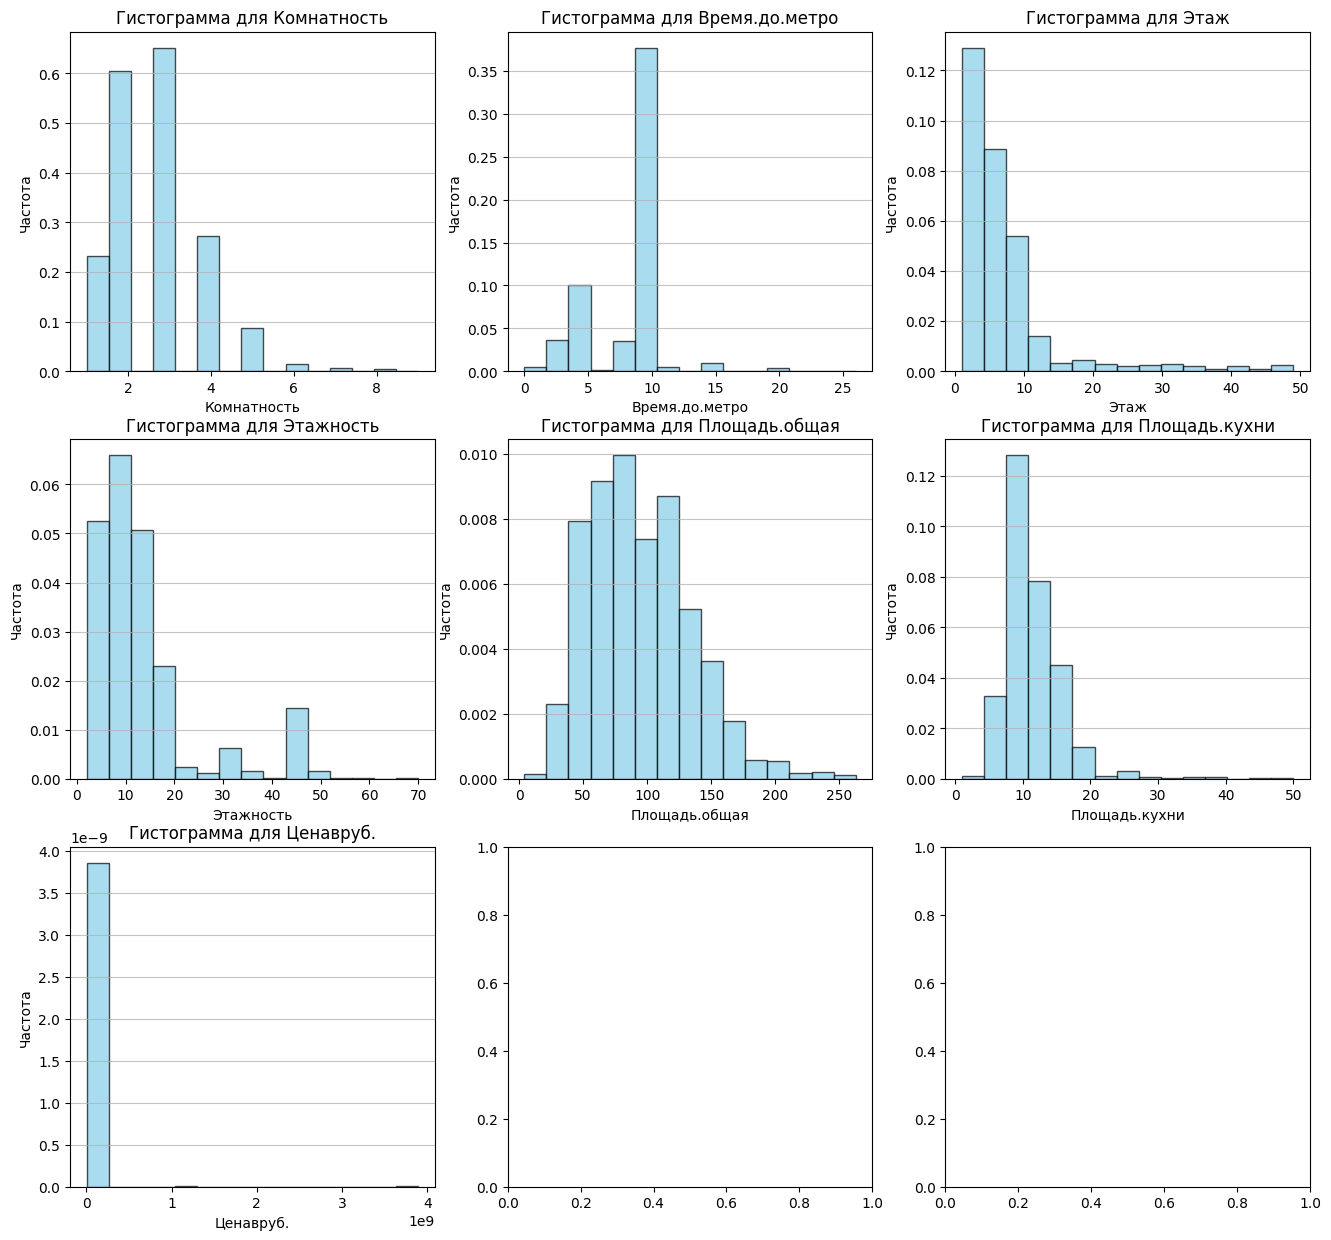

In [19]:
import matplotlib.pyplot as plt

numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(16, 15))
for i, column in enumerate(numeric_columns):
    ax = axs[i // 3, i % 3]
    ax.hist(data[column], bins=15, alpha=0.7, color='skyblue', edgecolor='black', density=True)

    ax.set_title(f'Гистограмма для {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Частота')
    ax.grid(axis='y', alpha=0.75)
plt.show()

Вы увидите, что поле ‘Ценавруб.’ распределено очень неравномерно. Постройте ящик с усами (boxplot) для этого поля.

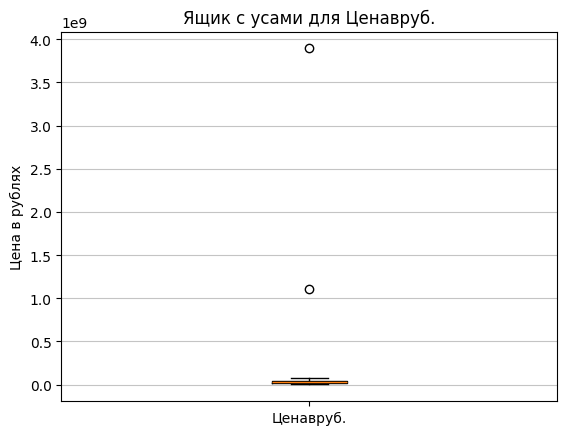

In [20]:
plt.boxplot(data['Ценавруб.'])

plt.title('Ящик с усами для Ценавруб.')
plt.ylabel('Цена в рублях')
plt.xticks([1], ['Ценавруб.'])
plt.grid(axis='y', alpha=0.75)

plt.show()

Вы увидите несколько выбросов. Выведите на экран строки, которые по значению на графике явно являются выбросами

In [21]:
# https://www.geeksforgeeks.org/interquartile-range-to-detect-outliers-in-data/
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html

Q1 = data['Ценавруб.'].quantile(0.25)
Q3 = data['Ценавруб.'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

data[(data['Ценавруб.'] < lower) | (data['Ценавруб.'] > upper)]

,Комнатность,Новостройка,Метро.Район,Время.до.метро,Этаж,Этажность,Площадь.общая,Площадь.кухни,Ценавруб.
1999,5,Нет,Киевская,10.0,34.0,47.0,241.0,16.490741,1.102189e+09
2001,4,Да,Парк культуры,10.0,1.0,6.0,251.0,14.317123,3.893019e+09


Просмотрев эти строки, убедитесь, что это, действительно, нетипичные объекты. Удалите эти строки и вновь постройте ящик с усами.

In [22]:
data = data[(data['Ценавруб.'] >= lower) & (data['Ценавруб.'] <= upper)]

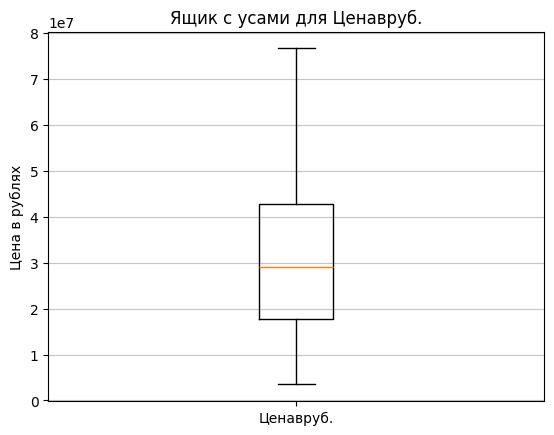

In [23]:
plt.boxplot(data['Ценавруб.'])

plt.title('Ящик с усами для Ценавруб.')
plt.ylabel('Цена в рублях')
plt.xticks([1], ['Ценавруб.'])
plt.grid(axis='y', alpha=0.75)

plt.show()

## Кодирование категориальных переменных

Переведите текстовые поля в числовые, используя метод унитарного кодирования (OneHotEncoding).

In [24]:
categorical_columns = data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
data.head()

,Комнатность,Время.до.метро,Этаж,Этажность,Площадь.общая,Площадь.кухни,Ценавруб.,Новостройка_Нет,Метро.Район_Арбатская,Метро.Район_Баррикадная,...,Метро.Район_Таганская,Метро.Район_Тверская,Метро.Район_Третьяковская,Метро.Район_Трубная,Метро.Район_Тургеневская,Метро.Район_Цветной бульвар,Метро.Район_Чеховская,Метро.Район_Чистые пруды,Метро.Район_Чкаловская,Метро.Район_смоленская - синяя
0,1,15.0,4.0,9.0,21.0,4.0,3500000.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,10.0,5.0,5.0,31.0,6.0,4700000.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,10.0,5.0,5.0,32.0,7.0,5000000.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,5.0,1.0,9.0,36.0,8.0,5350000.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2,10.0,5.0,5.0,41.0,6.0,5350000.0,True,False,False,...,True,False,False,False,False,False,False,False,False,False


Соберите таблицу – текстовые поля нужно удалить, взамен них в таблице должны быть поля, закодированные унитарным кодированием

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1558 entries, 0 to 1995
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Комнатность                        1558 non-null   int64  
 1   Время.до.метро                     1558 non-null   float64
 2   Этаж                               1558 non-null   float64
 3   Этажность                          1558 non-null   float64
 4   Площадь.общая                      1558 non-null   float64
 5   Площадь.кухни                      1558 non-null   float64
 6   Ценавруб.                          1558 non-null   float64
 7   Новостройка_Нет                    1558 non-null   bool   
 8   Метро.Район_Арбатская              1558 non-null   bool   
 9   Метро.Район_Баррикадная            1558 non-null   bool   
 10  Метро.Район_Белорусская            1558 non-null   bool   
 11  Метро.Район_Библиотека им. Ленина  1558 non-null   bool   
 1

## Формирование обучающего и тестового множества

Сформируйте 4 массива:
x_learn – входной массив обучающего множества
x_test – входной массив тестового множества
y_learn – выходной массив обучающего множества
y_test - выходной массив тестового множества


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = data.drop('Ценавруб.', axis=1)
y = data['Ценавруб.']
x_learn, x_test, y_learn, y_test = train_test_split(X, y, test_size=0.2)

In [28]:
print(f'learn: {x_learn.shape} - {y_learn.shape}; test: {x_test.shape} - {y_test.shape}')

learn: (1246, 48) - (1246,); test: (312, 48) - (312,)


## Выбор метрик

Загрузите из библиотеки sklearn.metrics не менее двух метрик, подходящих для данной задачи

In [29]:
# https://scikit-learn.org/stable/api/sklearn.metrics.html
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error, r2_score

Итак,
1.   MAE (Mean Absolute Error)
*   выражается в тех же единицах, что и целевая переменная и легко интерпретируется: MAE=200000 означает "модель ошибается на +-200 000 рублей"
*   не штрафует за большие ошибки
2.   RMSE (Root Mean Squared Error)
*   показывает насколько хорошо модель предсказывает вариативность данных
*   чувствительна к выбросам и сильно штрафует за большие ошибки (квадрат), в задаче

В целом, эти две метрики дополняют друг друга и являются базовыми. Если модель плохо работает с большими ценами - RMSE покажет это, а в целом можно смотреть на MAE.

Также, я бы хотел использовать R2 (коэф детерминации) и MAPE (Mean Absolute Percentage Error).
3.   R2 показывает, насколько модель лучше константного прогноза (среднего значения).
4.   MAPE, из того что я понял, является хорошим выбором, так как показывает относительные ошибки. Ошибиться на 500 тысяч для квартиры в 10 миллионов еще как приемлемо, но вот для квартиры за полтора - не очень.

# Второй этап: простые модели

## Функции

In [31]:
def training(model_name, x_learn=x_learn, x_test=x_test, retrn_model = False):
  global y_pred_learn, y_pred_test

  model = model_name
  model.fit(x_learn, y_learn)

  y_pred_learn = model.predict(x_learn)
  y_pred_test = model.predict(x_test)

  if retrn_model:
    return model

In [32]:
def results(prnt = True, retrn = False, graph = True):
  mae_learn = mean_absolute_error(y_learn, y_pred_learn)
  mae_test = mean_absolute_error(y_test, y_pred_test)
  rmse_learn = root_mean_squared_error(y_learn, y_pred_learn)
  rmse_test = root_mean_squared_error(y_test, y_pred_test)
  mape_learn = mean_absolute_percentage_error(y_learn, y_pred_learn)
  mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
  r2_learn = r2_score(y_learn, y_pred_learn)
  r2_test = r2_score(y_test, y_pred_test)

  if prnt:
    print(f'Learn: r2 = {r2_learn:.4f}; MAE = {mae_learn:.0f}; RMSE = {rmse_learn:.0f}; MAPE: {mape_learn:.4f}')
    print(f'Test: r2 = {r2_test:.4f}; MAE = {mae_test:.0f}; RMSE = {rmse_test:.0f}; MAPE: {mape_test:.4f}')


  if graph:
    plt.figure(figsize=(6, 6))
    plt.scatter(y_learn, y_pred_learn, label='Обучающая выборка', alpha=0.8, s=15)
    plt.scatter(y_test, y_pred_test,  label='Тестовая выборка', alpha=0.8, s=15)

    p1 = min(min(y_pred_learn), min(y_pred_test))
    p2 = max(max(y_pred_learn), max(y_pred_test))
    plt.plot([p1, p2],[p1, p2],color='red', linestyle='-', label='Идеальное предсказание (y = x)')

    plt.title('Результаты моделирования')
    plt.legend()
    plt.grid()
    plt.xlabel('Реальные значения')
    plt.ylabel('Прогнозные значения')
    plt.show()

  if retrn:
    return r2_test

## Linear

Learn: r2 = 0.8037; MAE = 5184510; RMSE = 7611884; MAPE: 0.1944
Test: r2 = 0.7702; MAE = 5797225; RMSE = 8327521; MAPE: 0.2068


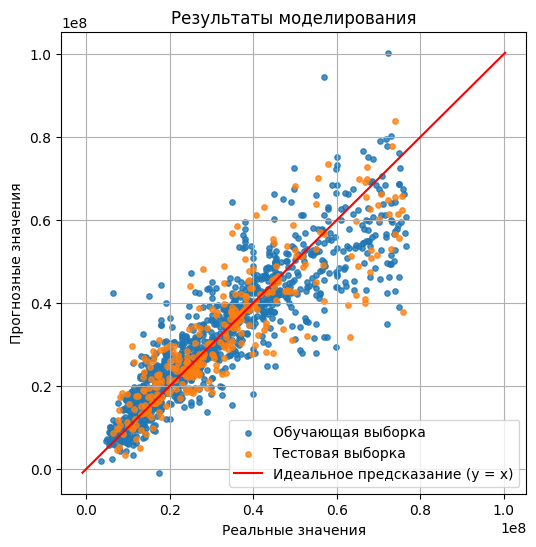

In [ ]:
from sklearn.linear_model import LinearRegression

training(LinearRegression())
results()

## Ridge

### определение alpha

In [ ]:
from sklearn.linear_model import Ridge

alphas, values = [], []
for i in range(1,100):
  training(Ridge(alpha=i))
  r2_now = results(prnt = False, retrn = True, graph=False)
  alphas.append(i)
  values.append(r2_now)

best r2: 0.7733211972680194, alpha = 10


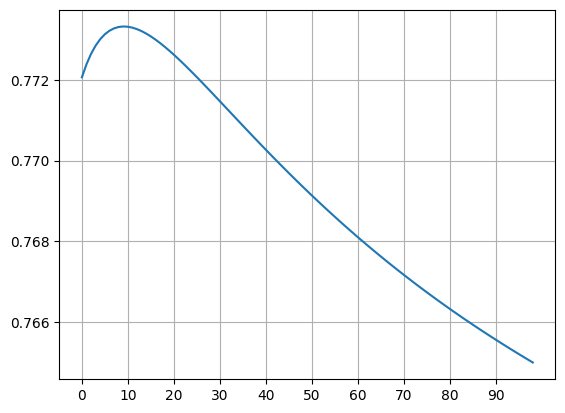

In [ ]:
index_max = values.index(max(values))
print(f"best r2: {values[index_max]}, alpha = {alphas[index_max]}")
plt.plot(values)
plt.grid()
plt.xticks(np.arange(0, 100, step=10))
plt.show()

### _

Learn: r2 = 0.7958; MAE = 5254346; RMSE = 7763591; MAPE: 0.1957
Test: r2 = 0.7733; MAE = 5732021; RMSE = 8271598; MAPE: 0.2041


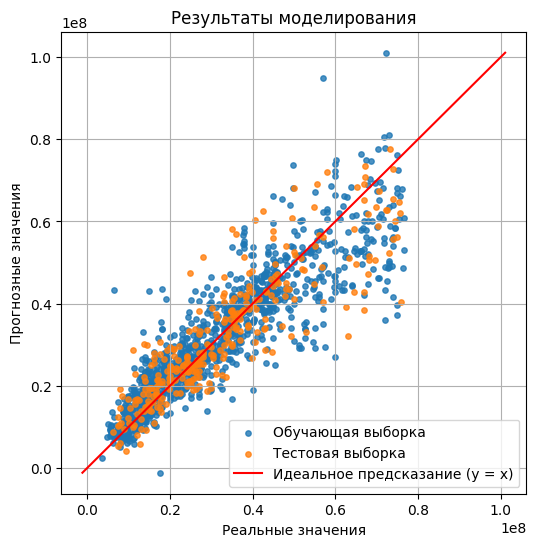

In [ ]:
from sklearn.linear_model import Ridge

training(Ridge(alpha=10))
results()

## Lasso

### опять альфа

In [ ]:
from sklearn.linear_model import Lasso

alphas, values = [], []
for i in range(1,10000,50):
  training(Lasso(alpha=i, max_iter=50000))
  r2_now = results(prnt = False, retrn = True, graph=False)
  alphas.append(i)
  values.append(r2_now)

best r2: 0.7726265592311695, alpha = 3051


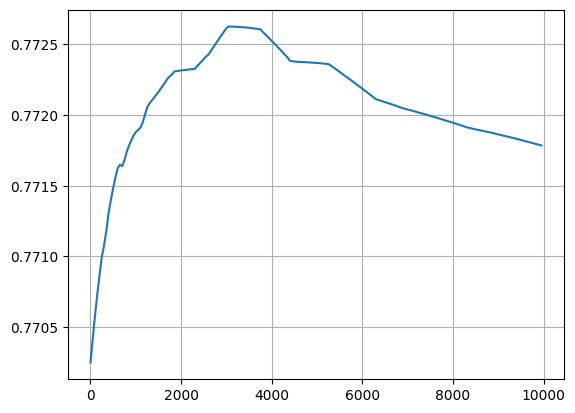

In [ ]:
index_max = values.index(max(values))
print(f"best r2: {values[index_max]}, alpha = {alphas[index_max]}")
plt.plot(alphas, values)
plt.grid()
plt.show()

### _

Learn: r2 = 0.8025; MAE = 5196338; RMSE = 7633365; MAPE: 0.1944
Test: r2 = 0.7726; MAE = 5739971; RMSE = 8284262; MAPE: 0.2055


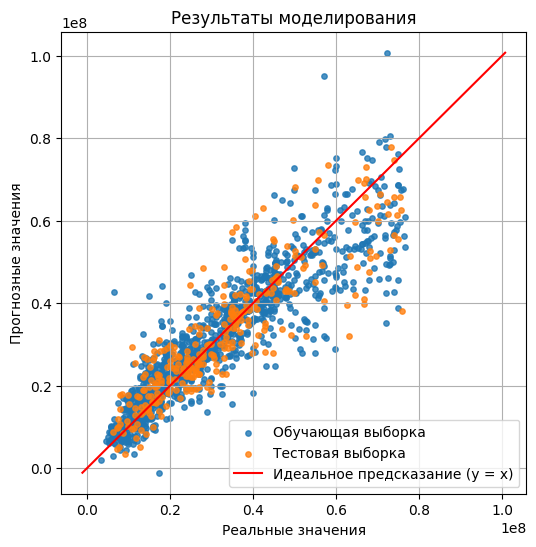

In [ ]:
from sklearn.linear_model import Lasso

training(Lasso(alpha=3051, max_iter=50000))
results()

## DecisionTreeRegressor

### подбор

In [ ]:
from sklearn.tree import DecisionTreeRegressor

alphas, values = [], []
for i in range(2,50):
  for j in range(1,50):
    training(DecisionTreeRegressor(min_samples_split=i, min_samples_leaf=j))
    r2_now = results(prnt = False, retrn = True, graph=False)
    alphas.append([i,j])
    values.append(r2_now)

In [ ]:
index_max = values.index(max(values))
print(f"best r2: {values[index_max]}, alpha = {alphas[index_max]}")
# plt.plot(values)
# plt.grid()
# plt.show()

best r2: 0.7846607487671606, alpha = [25, 11]


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [i for i in range(1,25)],
    'min_samples_split': [i for i in range(1,25)],
    'min_samples_leaf': [i for i in range(1,25)],
    'ccp_alpha': [0.0, 0.01, 0.02, 0.05, 0.1]
}

tree_model = DecisionTreeRegressor()

grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid,
                           cv=5, scoring='r2', n_jobs=-1)

grid_search.fit(x_learn_scaled, y_learn)

best_params = grid_search.best_params_
print("Лучшие параметры:", best_params)

best_tree_model = grid_search.best_estimator_

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
2880 fits failed out of a total of 69120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2880 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/

Лучшие параметры: {'max_depth': 12, 'min_samples_leaf': 7, 'min_samples_split': 22}


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [       nan 0.56291711 0.56291711 ... 0.75578167 0.75578167 0.75578167]
  warnings.warn(


### _

Learn: r2 = 0.8325; MAE = 4700485; RMSE = 7030186; MAPE: 0.1720
Test: r2 = 0.7854; MAE = 5527284; RMSE = 8047302; MAPE: 0.1960


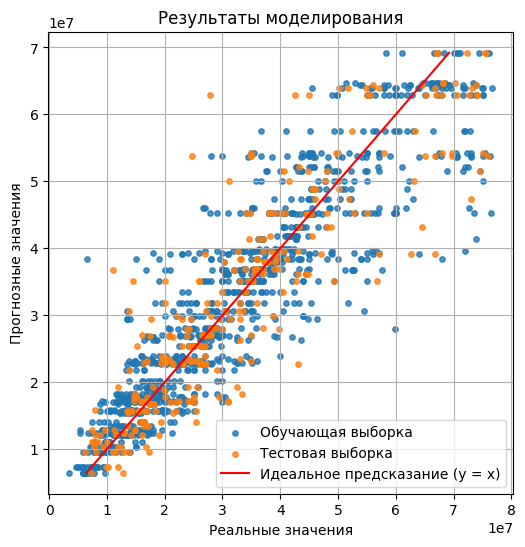

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_model = training(DecisionTreeRegressor(min_samples_leaf=11, min_samples_split=25), x_learn_scaled, x_test_scaled, retrn_model = True) # split25 leaf11  # ccp_alpha=10e11
results()

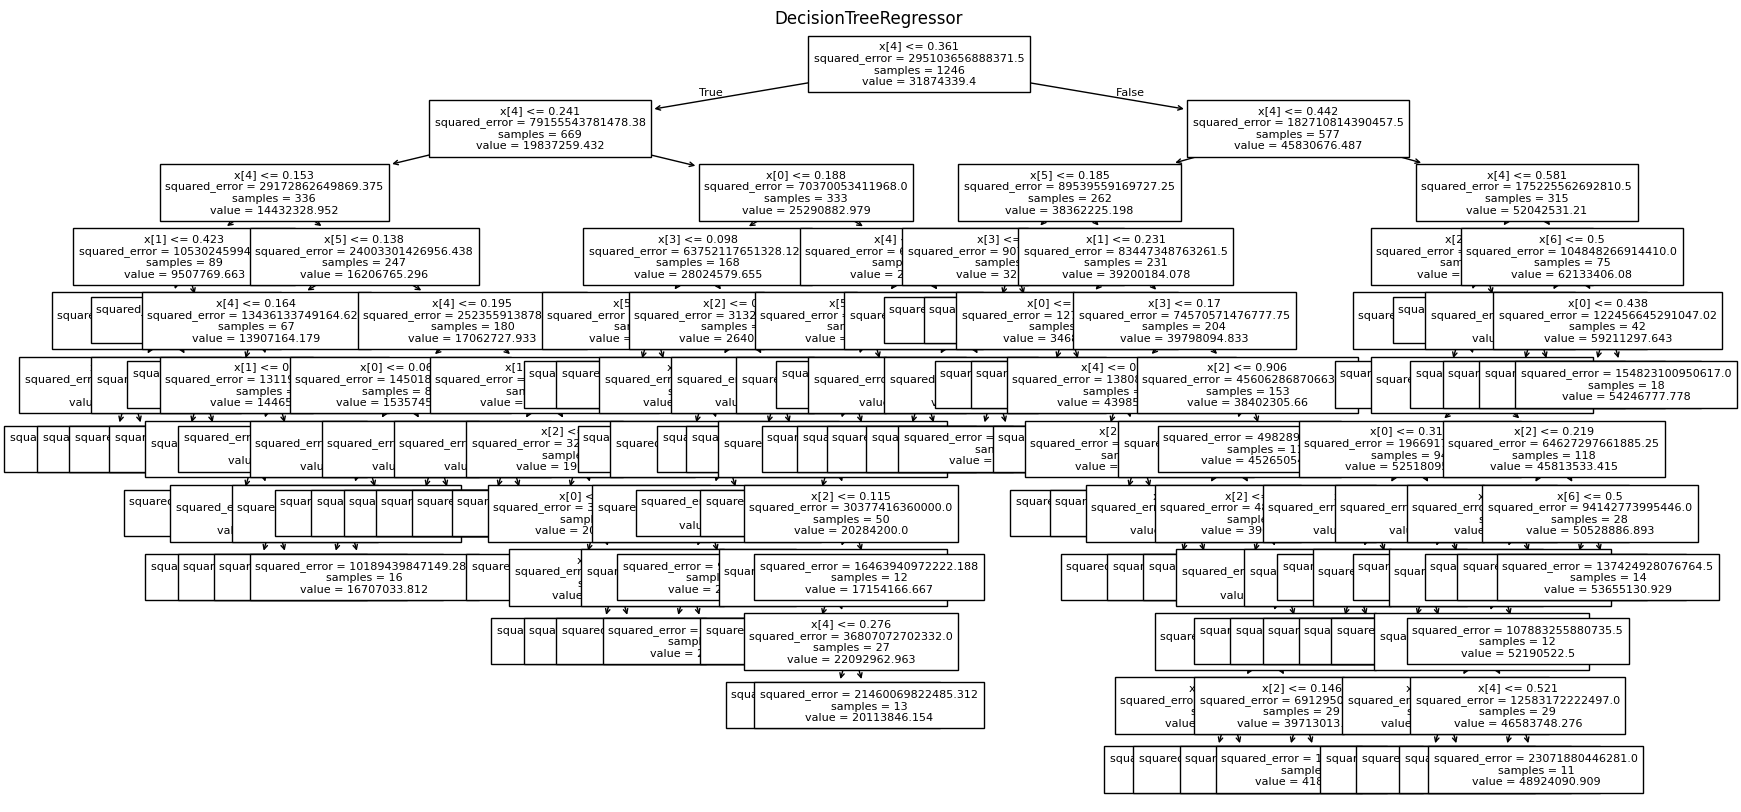

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(tree_model,fontsize=8)
plt.title("DecisionTreeRegressor")
plt.show()

## Ансамбли

### bagging

Learn: r2 = 0.9737; MAE = 1703809; RMSE = 2784490; MAPE: 0.0626
Test: r2 = 0.8119; MAE = 4659379; RMSE = 7535138; MAPE: 0.1606


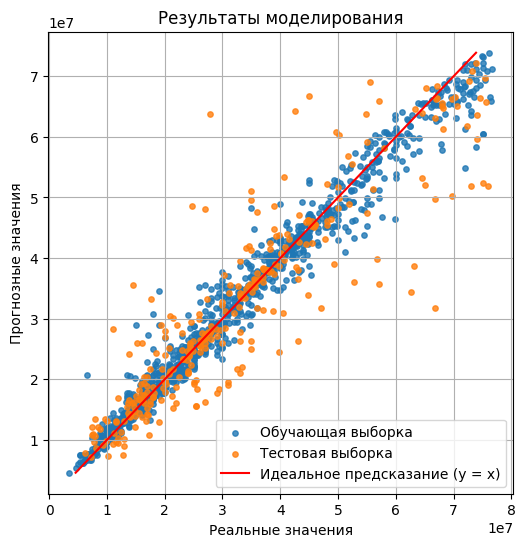

In [ ]:
from sklearn.ensemble import BaggingRegressor

training(BaggingRegressor(n_estimators = 100))
results()

### подбор bagg

In [ ]:
alphas, values = [], []
for i in range(2,25):
  for j in range(1,25):
    DT = DecisionTreeRegressor(min_samples_split=i, min_samples_leaf=j)
    training(BaggingRegressor(estimator = DT, n_estimators = 100), x_learn_scaled, x_test_scaled)
    r2_now = results(prnt = False, retrn = True, graph=False)
    alphas.append([i,j])
    values.append(r2_now)

In [ ]:
index_max = values.index(max(values))
print(f"best r2: {values[index_max]}, ij = {alphas[index_max]}")

best r2: 0.8210168380712706, ij = [2, 3]


### кастомный bagging

Learn: r2 = 0.9240; MAE = 2961309; RMSE = 4734965; MAPE: 0.1092
Test: r2 = 0.8193; MAE = 4749517; RMSE = 7385080; MAPE: 0.1689


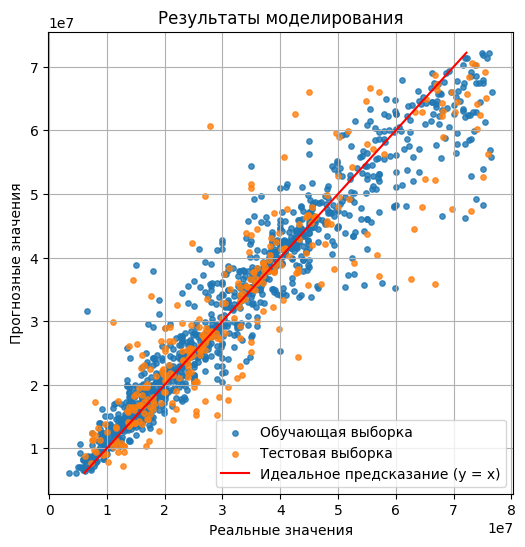

In [ ]:
from sklearn.ensemble import BaggingRegressor

DT = DecisionTreeRegressor(min_samples_split = 2, min_samples_leaf = 3)
training(BaggingRegressor(estimator = DT, n_estimators = 100), x_learn_scaled, x_test_scaled)
results()

### подбор grbst

In [ ]:
alphas, values = [], []
for i in range(2,10):
  training(GradientBoostingRegressor(n_estimators = 1000, min_samples_split = i, ccp_alpha = 1e10))
  r2_now = results(prnt = False, retrn = True, graph=False)
  alphas.append(i)
  values.append(r2_now)

In [ ]:
index_max = values.index(max(values))
print(f"best r2: {values[index_max]}, ij = {alphas[index_max]}")

best r2: 0.8457524937745957, ij = 8


### gradient boosting

Learn: r2 = 0.9063; MAE = 3614905; RMSE = 5259079; MAPE: 0.1393
Test: r2 = 0.8441; MAE = 4655780; RMSE = 6859862; MAPE: 0.1649


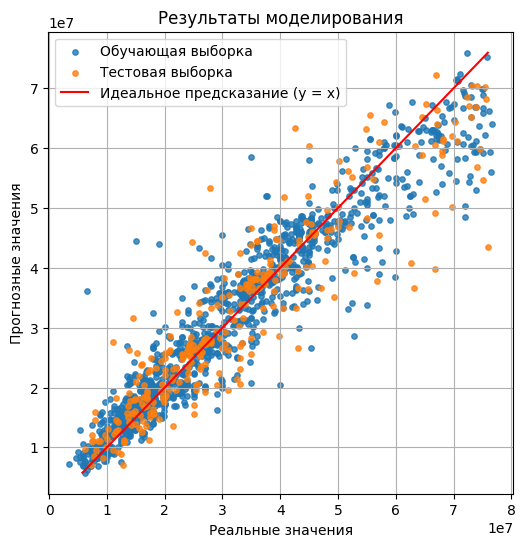

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

training(GradientBoostingRegressor(n_estimators = 2000, learning_rate = 0.01, min_samples_split = 10, ccp_alpha=10e11))
results()

### random forest

Learn: r2 = 0.9732; MAE = 1743655; RMSE = 2803374; MAPE: 0.0633
Test: r2 = 0.8413; MAE = 4409431; RMSE = 6978236; MAPE: 0.1706


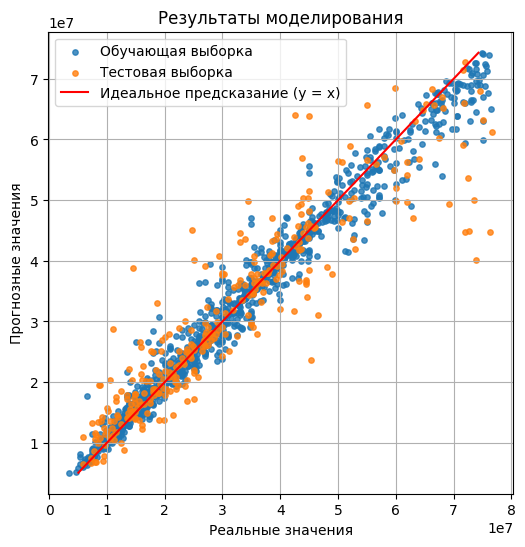

In [39]:
from sklearn.ensemble import RandomForestRegressor

training(RandomForestRegressor(n_estimators = 100))
results()

# Третий этап: нейронные сети

## scaling

In [30]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
x_learn_scaled = scaler.fit_transform(x_learn)
x_test_scaled = scaler.transform(x_test)

scaler_y = MinMaxScaler()
y_learn_scaled = scaler_y.fit_transform(y_learn.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

y_learn_scaled = y_learn_scaled.ravel()
y_test_scaled = y_test_scaled.ravel()

## функции

In [31]:
def metrics_graph(yl, yt, ypl, ypt, prnt = True, retrn = False, graph = True):
  mae_learn = mean_absolute_error(yl, ypl)
  mae_test = mean_absolute_error(yt, ypt)
  rmse_learn = root_mean_squared_error(yl, ypl)
  rmse_test = root_mean_squared_error(yt, ypt)
  mape_learn = mean_absolute_percentage_error(yl, ypl)
  mape_test = mean_absolute_percentage_error(yt, ypt)
  r2_learn = r2_score(yl, ypl)
  r2_test = r2_score(yt, ypt)

  if prnt:
    print(f'Learn: r2 = {r2_learn:.4f}; MAE = {mae_learn:.0f}; RMSE = {rmse_learn:.0f}; MAPE: {mape_learn:.4f}')
    print(f'Test: r2 = {r2_test:.4f}; MAE = {mae_test:.0f}; RMSE = {rmse_test:.0f}; MAPE: {mape_test:.4f}')


  if graph:
    plt.figure(figsize=(6, 6))
    plt.scatter(yl, ypl, label='Обучающая выборка', alpha=0.8, s=15)
    plt.scatter(yt, ypt,  label='Тестовая выборка', alpha=0.8, s=15)

    p1 = min(min(ypl), min(ypt))
    p2 = max(max(ypl), max(ypt))
    plt.plot([p1, p2],[p1, p2],color='red', linestyle='-', label='Идеальное предсказание (y = x)')

    plt.title('Результаты моделирования')
    plt.legend()
    plt.grid()
    plt.xlabel('Реальные значения')
    plt.ylabel('Прогнозные значения')
    plt.show()

  if retrn:
    return r2_test

## mlpregressor обычный и подборы

Learn: r2 = 0.8855; MAE = 3713280; RMSE = 5797272; MAPE: 0.1321
Test: r2 = 0.8497; MAE = 4373466; RMSE = 6789239; MAPE: 0.1629


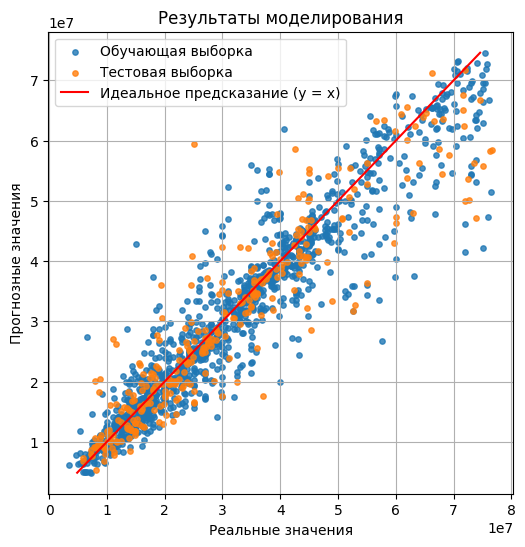

In [207]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes = (100, 100, 100, 100, 100,))

model.fit(x_learn_scaled, y_learn_scaled)

y_pred_learn_scaled = model.predict(x_learn_scaled)
y_pred_test_scaled = model.predict(x_test_scaled)

y_learn_unscaled = scaler_y.inverse_transform(y_learn_scaled.reshape(-1, 1))
y_test_unscaled = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1))
y_pred_learn_unscaled = scaler_y.inverse_transform(y_pred_learn_scaled.reshape(-1, 1))
y_pred_test_unscaled = scaler_y.inverse_transform(y_pred_test_scaled.reshape(-1, 1))

metrics_graph(y_learn_unscaled, y_test_unscaled, y_pred_learn_unscaled, y_pred_test_unscaled)

In [179]:
from sklearn.neural_network import MLPRegressor

results = []
for e in []:
  print(e)

  model = MLPRegressor(hidden_layer_sizes = (100, 100, 100, 100, 100,), activation = 'relu', solver = 'adam')

  model.fit(x_learn_scaled, y_learn_scaled)

  y_pred_learn_scaled = model.predict(x_learn_scaled)
  y_pred_test_scaled = model.predict(x_test_scaled)

  y_learn_unscaled = scaler_y.inverse_transform(y_learn_scaled.reshape(-1, 1))
  y_test_unscaled = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1))
  y_pred_learn_unscaled = scaler_y.inverse_transform(y_pred_learn_scaled.reshape(-1, 1))
  y_pred_test_unscaled = scaler_y.inverse_transform(y_pred_test_scaled.reshape(-1, 1))

  r2_now = metrics_graph(y_learn_unscaled, y_test_unscaled, y_pred_learn_unscaled, y_pred_test_unscaled, retrn = True,  graph = False)
  results.append(r2_now)

print(results)

[]


## mlpregressor усложнение

#### старый код из partial_fit

In [ ]:
# def test_loss_callback(model, x_test, y_test, x_train, y_train):
#     def callback(epoch):
#         learning_loss = model.loss_
#         y_test_pred = model.predict(x_test)
#         test_loss = mean_squared_error(y_test, y_test_pred)

#         print(f"Iteration {epoch}, Learning Loss: {learning_loss}, Test Loss: {test_loss}")
#         return learning_loss, test_loss
#     return callback


# callback = test_loss_callback(model, x_test_scaled, y_test_scaled, x_learn_scaled, y_learn_scaled)



# learn_losses_ = []
# test_losses_ = []


# import copy

# model_backup = copy.deepcopy(model)
# learn_losses_backup = copy.deepcopy(learn_losses_)
# test_losses_backup = copy.deepcopy(test_losses_)

# model = copy.deepcopy(model_backup)
# learn_losses_ = copy.deepcopy(learn_losses_backup)
# test_losses_ = copy.deepcopy(test_losses_backup)

# for epoch in range(30):
#     model.partial_fit(x_learn_scaled, y_learn_scaled)
#     ls, ts = callback(epoch)
#     learn_losses_.append(ls)
#     test_losses_.append(ts)


# plt.plot(range(len(learn_losses_)), learn_losses_, label = "learn")
# plt.plot(range(len(test_losses_)), test_losses_, label = "test")

# step = 20
# plt.xticks(range(0, len(learn_losses_)+1, step))

# plt.legend()
# plt.show()

### _

In [541]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

model = MLPRegressor(hidden_layer_sizes = (100, 100, 100, 100, 100,), early_stopping=True, validation_fraction=0.2, verbose = True)

In [544]:
model.fit(x_learn_scaled, y_learn_scaled)

Iteration 1, loss = 0.09272551
Validation score: -0.154286
Iteration 2, loss = 0.04055644
Validation score: -0.241840
Iteration 3, loss = 0.02818105
Validation score: 0.080117
Iteration 4, loss = 0.02677151
Validation score: 0.121548
Iteration 5, loss = 0.02177927
Validation score: 0.259762
Iteration 6, loss = 0.02047155
Validation score: 0.330941
Iteration 7, loss = 0.01762926
Validation score: 0.382603
Iteration 8, loss = 0.01624976
Validation score: 0.484792
Iteration 9, loss = 0.01395517
Validation score: 0.568309
Iteration 10, loss = 0.01170042
Validation score: 0.649017
Iteration 11, loss = 0.00984359
Validation score: 0.691330
Iteration 12, loss = 0.00867121
Validation score: 0.698917
Iteration 13, loss = 0.00784435
Validation score: 0.708327
Iteration 14, loss = 0.00728645
Validation score: 0.706311
Iteration 15, loss = 0.00665788
Validation score: 0.705193
Iteration 16, loss = 0.00634092
Validation score: 0.708641
Iteration 17, loss = 0.00602318
Validation score: 0.712053
Iter

MLPRegressor(early_stopping=True, hidden_layer_sizes=(100, 100, 100, 100, 100),
             validation_fraction=0.2, verbose=True)

Learn: r2 = 0.8767; MAE = 3745756; RMSE = 6018160; MAPE: 0.1394
Test: r2 = 0.8439; MAE = 4446869; RMSE = 6920391; MAPE: 0.1717


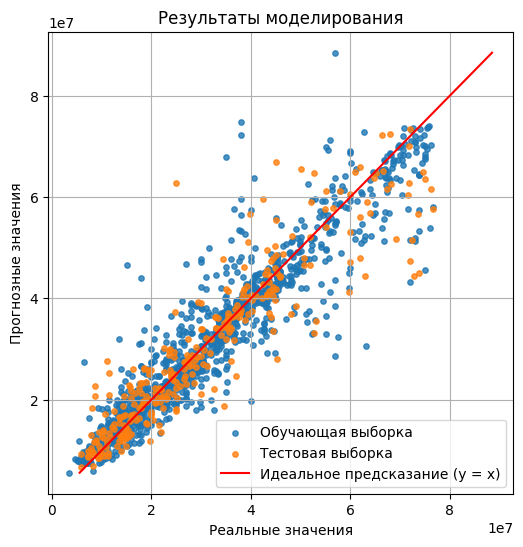

In [545]:
y_pred_learn_scaled = model.predict(x_learn_scaled)
y_pred_test_scaled = model.predict(x_test_scaled)

y_learn_unscaled = scaler_y.inverse_transform(y_learn_scaled.reshape(-1, 1))
y_test_unscaled = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1))
y_pred_learn_unscaled = scaler_y.inverse_transform(y_pred_learn_scaled.reshape(-1, 1))
y_pred_test_unscaled = scaler_y.inverse_transform(y_pred_test_scaled.reshape(-1, 1))

metrics_graph(y_learn_unscaled, y_test_unscaled, y_pred_learn_unscaled, y_pred_test_unscaled)

In [546]:
model.n_iter_

76

## gridsearch etc

In [38]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neural_network import MLPRegressor

parameters = {
    'alpha': [0.001, 0.01, 0.1, 1],
    'hidden_layer_sizes': [(100, 100, 100), (50, 50)],
    'tol': [1e-4, 1e-5],
    'validation_fraction': [0.1, 0.2],
}

model = MLPRegressor(early_stopping=True, verbose = True, max_iter = 200)

# o_model = GridSearchCV(model, parameters)
o_model = RandomizedSearchCV(model, parameters, n_iter=10)


o_model.fit(x_learn_scaled, y_learn_scaled)

Выходные данные были обрезаны до нескольких последних строк (5000).
Iteration 48, loss = 0.00753079
Validation score: 0.573857
Iteration 49, loss = 0.00739417
Validation score: 0.581214
Iteration 50, loss = 0.00727661
Validation score: 0.587357
Iteration 51, loss = 0.00714731
Validation score: 0.592369
Iteration 52, loss = 0.00703383
Validation score: 0.598081
Iteration 53, loss = 0.00693805
Validation score: 0.603685
Iteration 54, loss = 0.00681584
Validation score: 0.608960
Iteration 55, loss = 0.00671966
Validation score: 0.612618
Iteration 56, loss = 0.00663977
Validation score: 0.616512
Iteration 57, loss = 0.00651872
Validation score: 0.623609
Iteration 58, loss = 0.00641978
Validation score: 0.628813
Iteration 59, loss = 0.00633511
Validation score: 0.634002
Iteration 60, loss = 0.00622208
Validation score: 0.639227
Iteration 61, loss = 0.00614573
Validation score: 0.643098
Iteration 62, loss = 0.00605641
Validation score: 0.646869
Iteration 63, loss = 0.00597491
Validation scor

RandomizedSearchCV(estimator=MLPRegressor(early_stopping=True, verbose=True),
                   param_distributions={'alpha': [0.001, 0.01, 0.1, 1],
                                        'hidden_layer_sizes': [(100, 100, 100),
                                                               (50, 50)],
                                        'tol': [0.0001, 1e-05],
                                        'validation_fraction': [0.1, 0.2]})

In [39]:
o_model.best_params_

{'validation_fraction': 0.1,
 'tol': 0.0001,
 'hidden_layer_sizes': (100, 100, 100),
 'alpha': 0.01}

Learn: r2 = 0.8600; MAE = 4170155; RMSE = 6417809; MAPE: 0.1511
Test: r2 = 0.8089; MAE = 5116110; RMSE = 7641923; MAPE: 0.1667


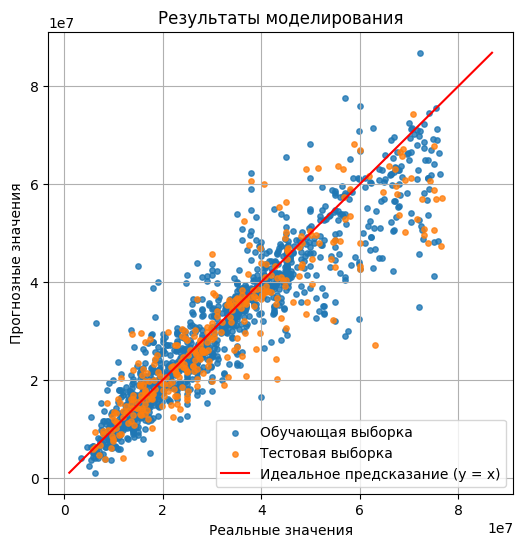

In [40]:
y_pred_learn_scaled = o_model.predict(x_learn_scaled)
y_pred_test_scaled = o_model.predict(x_test_scaled)

y_learn_unscaled = scaler_y.inverse_transform(y_learn_scaled.reshape(-1, 1))
y_test_unscaled = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1))
y_pred_learn_unscaled = scaler_y.inverse_transform(y_pred_learn_scaled.reshape(-1, 1))
y_pred_test_unscaled = scaler_y.inverse_transform(y_pred_test_scaled.reshape(-1, 1))

metrics_graph(y_learn_unscaled, y_test_unscaled, y_pred_learn_unscaled, y_pred_test_unscaled)